<center><font size=5>ECE720X50 - Mini Project 1</font></center>
<center><font size=5>TASK 1</font></center>

<center><b>Group Member: Zhaoyi Wang, Jiyuan Zhao, Yafei Sun</b></center>
<center><b> Group Contact Information: zhaoyi5@ualberta.ca </b></center>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
import warnings
warnings.simplefilter('ignore')

## Preparation

In [71]:
# Read the dataset
weather = pd.read_csv('../Database/weatherstats_edmonton_hourly.csv')
weather.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-12-18 16:00:00 MST,1545174000,91.73,99.7,SW,23.0,5.0,NaN,64.0,-7.3,-1.3,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-18 15:00:00 MST,1545170400,91.67,99.7,S,18.0,5.0,NaN,65.0,-6.3,-0.5,-2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,2018-12-18 14:00:00 MST,1545166800,91.67,99.6,S,17.0,5.0,NaN,51.0,-6.5,2.7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,2018-12-18 13:00:00 MST,1545163200,91.66,99.6,SE,13.0,2.0,NaN,50.0,-6.4,2.9,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN
4,2018-12-18 12:00:00 MST,1545159600,91.75,99.7,NaN,NaN,0.0,NaN,59.0,-6.6,0.5,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN


In [72]:
# Read the dataset
mosquito = pd.read_csv('../Database/Mosquito_Trap_Data.csv')
mosquito.head()

,Trap Date,Genus,Specific Epithet,Gender,IDd,Count,Trap Region,Include,Comparison Group,Latitude,Longitude,Location
0,09/15/2015 12:00:00 AM,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,POINT (-113.787353 53.5629733)
1,05/12/1998 12:00:00 AM,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
2,08/28/2001 12:00:00 AM,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
3,08/17/2004 12:00:00 AM,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
4,05/15/2018 12:00:00 AM,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,POINT (-114.00119 53.559020000000004)


In [73]:
# Method to remove MST from the date
def format_date(series, offsets):
    date_formatted = []

    for date in series:
        date = date[0:offsets]
        date_formatted.append(date)

    date_formatted = pd.Series(date_formatted)
    return date_formatted

### Processing the WEATHER dataset

In [74]:
date_formatted_0 = format_date(weather['date_time_local'], 10)

In [75]:
# Determine if the type is correct after formatting the date
type(date_formatted_0)

pandas.core.series.Series

In [76]:
# Date reassignment after correcting format -> weather dataset
weather['date_time_local'] = date_formatted_0
weather = weather.drop(columns=['unixtime'])
weather = weather.rename(columns={'date_time_local': 'Date'})

In [77]:
weather.head()

,Date,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-12-18,91.73,99.7,SW,23.0,5.0,NaN,64.0,-7.3,-1.3,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-18,91.67,99.7,S,18.0,5.0,NaN,65.0,-6.3,-0.5,-2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,2018-12-18,91.67,99.6,S,17.0,5.0,NaN,51.0,-6.5,2.7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,2018-12-18,91.66,99.6,SE,13.0,2.0,NaN,50.0,-6.4,2.9,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN
4,2018-12-18,91.75,99.7,NaN,NaN,0.0,NaN,59.0,-6.6,0.5,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN


In [78]:
# Aggregate data by time and take the average
weather = weather.groupby('Date').agg('mean')

In [79]:
# Delete columns with NaN
weather = weather.dropna(axis=1, how='all')  # for column

In [80]:
weather.head()

,pressure_station,pressure_sea,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,health_index
Date,,,,,,,,,,,
2016-12-18,92.502857,100.557143,27.571429,17.428571,33.666667,53.000000,-6.371429,2.271429,NaN,NaN,2.371429
2016-12-19,92.041667,99.987500,25.125000,15.625000,41.285714,52.250000,-8.091667,0.891667,-4.375000,NaN,2.737500
2016-12-20,92.529167,100.587500,23.208333,7.625000,NaN,59.625000,-10.787500,-3.945833,-7.041667,NaN,3.483333
2016-12-21,93.054583,101.150000,21.916667,11.625000,31.000000,59.625000,-7.987500,-0.808333,-6.750000,NaN,3.112500
2016-12-22,92.422917,100.433333,25.208333,7.250000,NaN,63.208333,-7.320833,-0.941667,-3.764706,NaN,3.783333


In [81]:
# Set index to the first column to prepare for the following resample
weather = weather.reset_index()

# Uniform time period, use resample() method, take the average
weather['Date'] = pd.DatetimeIndex(weather['Date'])
weather = weather.resample('W-TUE', on='Date').mean()

weather

,pressure_station,pressure_sea,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,health_index
Date,,,,,,,,,,,
2016-12-20,92.357897,100.377381,25.301587,13.559524,37.476190,54.958333,-8.416865,-0.260913,-5.708333,NaN,2.864087
2016-12-27,93.168631,101.390476,19.511905,10.047619,31.000000,75.898810,-12.560119,-8.757738,-13.859244,NaN,2.829167
2017-01-03,93.679286,101.951786,25.904762,9.255952,30.125000,75.976190,-13.185119,-9.477976,-13.841165,NaN,2.861820
2017-01-10,93.957143,102.371429,21.922619,10.452381,31.750000,83.869048,-17.872619,-15.773214,-22.035714,NaN,2.700000
2017-01-17,93.060536,101.256548,21.851190,10.244048,43.846154,69.309524,-11.466667,-6.622024,-12.156004,NaN,3.556548
...,...,...,...,...,...,...,...,...,...,...,...
2018-11-20,93.802024,101.963631,21.857143,9.351190,33.333333,78.863095,-5.185119,-1.810714,-9.360317,NaN,2.430952
2018-11-27,92.844405,100.916071,17.178030,8.130952,31.000000,80.220238,-4.804167,-1.738095,-5.604365,NaN,2.520833
2018-12-04,93.199858,101.327640,21.318582,8.288043,31.357143,83.305383,-5.762060,-3.191046,-7.055100,NaN,2.491071


### Processing mosquito datasets

In [82]:
date_formatted_1 = format_date(mosquito['Trap Date'], 10)

In [83]:
type(date_formatted_1)

pandas.core.series.Series

In [84]:
mosquito['Trap Date'] = date_formatted_1

In [85]:
mosquito.head()

,Trap Date,Genus,Specific Epithet,Gender,IDd,Count,Trap Region,Include,Comparison Group,Latitude,Longitude,Location
0,09/15/2015,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,POINT (-113.787353 53.5629733)
1,05/12/1998,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
2,08/28/2001,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
3,08/17/2004,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
4,05/15/2018,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,POINT (-114.00119 53.559020000000004)


In [86]:
mosquito = mosquito.rename(columns={'Trap Date': 'Date'})
mosquito = pd.DataFrame(mosquito, columns=['Date', 'Gender', 'Count'])

In [87]:
mosquito.head()

,Date,Gender,Count
0,09/15/2015,Female,3
1,05/12/1998,Male,1
2,08/28/2001,Female,1
3,08/17/2004,Female,1
4,05/15/2018,Female,2


In [88]:
# Convert to a uniform time format
import time


def format_date_2(series):
    date_formatted = []

    for date in series:
        date = time.strptime(date, "%m/%d/%Y")
        new_date = time.strftime("%Y-%m-%d", date)
        date_formatted.append(new_date)

    date_formatted = pd.Series(date_formatted)
    return date_formatted

In [89]:
# Assignment after conversion
mosquito['Date'] = format_date_2(mosquito['Date'])

In [90]:
mosquito.head()

,Date,Gender,Count
0,2015-09-15,Female,3
1,1998-05-12,Male,1
2,2001-08-28,Female,1
3,2004-08-17,Female,1
4,2018-05-15,Female,2


In [91]:
# groupby for (male and female) and (total), respectively
mosquito_with_gender = mosquito.groupby(['Gender', 'Date']).agg('sum')
mosquito_with_count = mosquito.groupby('Date').agg('sum')

In [92]:
mosquito_with_gender

Count
Gender Date             
Female 1990-05-22     34
       1990-05-29    838
       1990-06-05    341
       1990-06-12    223
       1990-06-19    737
...                  ...
Male   2020-08-25    336
       2020-09-01    138
       2020-09-08    259
       2020-09-15    298
       2020-09-22    258

[1005 rows x 1 columns]

In [93]:
mosquito_with_count

,Count
Date,
1990-05-22,34
1990-05-29,838
1990-06-05,341
1990-06-12,223
1990-06-19,737
...,...
2020-08-25,645
2020-09-01,195
2020-09-08,356


In [94]:
mosquito_with_gender = mosquito_with_gender.unstack().T
mosquito_with_gender

Gender            Female   Male
      Date                     
Count 1990-05-22    34.0    NaN
      1990-05-29   838.0    NaN
      1990-06-05   341.0    NaN
      1990-06-12   223.0    NaN
      1990-06-19   737.0    NaN
...                  ...    ...
      2020-08-25   309.0  336.0
      2020-09-01    57.0  138.0
      2020-09-08    97.0  259.0
      2020-09-15   112.0  298.0
      2020-09-22    72.0  258.0

[584 rows x 2 columns]

In [95]:
mosquito_with_gender = mosquito_with_gender.reset_index()
mosquito_with_gender

Gender,level_0,Date,Female,Male
0,Count,1990-05-22,34.0,NaN
1,Count,1990-05-29,838.0,NaN
2,Count,1990-06-05,341.0,NaN
3,Count,1990-06-12,223.0,NaN
4,Count,1990-06-19,737.0,NaN
...,...,...,...,...
579,Count,2020-08-25,309.0,336.0
580,Count,2020-09-01,57.0,138.0
581,Count,2020-09-08,97.0,259.0
582,Count,2020-09-15,112.0,298.0


In [96]:
mosquito_with_count = mosquito_with_count.reset_index()
mosquito_with_count

,Date,Count
0,1990-05-22,34
1,1990-05-29,838
2,1990-06-05,341
3,1990-06-12,223
4,1990-06-19,737
...,...,...
579,2020-08-25,645
580,2020-09-01,195
581,2020-09-08,356
582,2020-09-15,410


In [97]:
# Splice two tables
merge_mosquito = pd.merge(mosquito_with_gender,
                          mosquito_with_count,
                          how='inner',
                          on='Date')
merge_mosquito = merge_mosquito.drop(columns=['level_0'])
merge_mosquito

,Date,Female,Male,Count
0,1990-05-22,34.0,NaN,34
1,1990-05-29,838.0,NaN,838
2,1990-06-05,341.0,NaN,341
3,1990-06-12,223.0,NaN,223
4,1990-06-19,737.0,NaN,737
...,...,...,...,...
579,2020-08-25,309.0,336.0,645
580,2020-09-01,57.0,138.0,195
581,2020-09-08,97.0,259.0,356
582,2020-09-15,112.0,298.0,410


In [98]:
# Replace NaN with 0
merge_mosquito = merge_mosquito.fillna(0)

In [99]:
# Rename for easy differentiation
merge_mosquito = merge_mosquito.rename(columns={"Count": "Mos Count"})
print('merge_mosquito shape:', merge_mosquito.shape)

merge_mosquito shape: (584, 4)


In [100]:
merge_mosquito = merge_mosquito.set_index(merge_mosquito.columns[0])
merge_mosquito

,Female,Male,Mos Count
Date,,,
1990-05-22,34.0,0.0,34
1990-05-29,838.0,0.0,838
1990-06-05,341.0,0.0,341
1990-06-12,223.0,0.0,223
1990-06-19,737.0,0.0,737
...,...,...,...
2020-08-25,309.0,336.0,645
2020-09-01,57.0,138.0,195
2020-09-08,97.0,259.0,356


### Merge Data to One Dataframe

In [101]:
# Join two dataframes based on index -> join method inner: only the parts common to both are kept
merge_result_based_date = weather.join(merge_mosquito, how='inner')

In [102]:
merge_result_based_date

,pressure_station,pressure_sea,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,health_index,Female,Male,Mos Count
Date,,,,,,,,,,,,,,
2017-05-09,93.290357,101.137619,23.577381,10.803571,36.642857,43.601190,1.245238,14.760119,NaN,26.125000,2.737500,26.0,0.0,26
2017-05-16,93.037976,100.916667,14.613095,14.202381,32.828571,65.797619,3.723214,10.885714,NaN,NaN,2.398214,23.0,6.0,29
2017-05-23,93.778452,101.660119,20.345238,10.875000,30.083333,45.613095,2.084524,15.286310,NaN,26.500000,2.463095,198.0,325.0,523
2017-05-30,93.317381,101.142262,20.892857,16.077381,34.324830,47.666667,3.257143,15.589881,NaN,25.000000,2.459524,150.0,213.0,363
2017-06-06,93.221905,101.009524,22.994048,13.238095,33.115584,54.500000,7.428571,17.765476,NaN,26.050000,2.852976,526.0,1130.0,1656
2017-06-13,92.799286,100.566667,18.101190,14.309524,31.658388,61.452381,8.191071,16.723214,NaN,25.864286,2.543333,1261.0,1708.0,2969
2017-06-20,93.194405,101.018452,23.720238,11.238095,35.162500,62.250000,7.318452,15.481548,NaN,NaN,2.275952,895.0,977.0,1872
2017-06-27,93.718393,101.567262,24.952381,18.089286,38.913483,53.613095,6.016667,16.300595,NaN,26.964286,2.364286,332.0,437.0,769
2017-07-04,93.421429,101.219643,23.494048,11.327381,32.795238,61.857143,10.094048,18.433333,NaN,25.851496,2.283333,1074.0,705.0,1779


In [103]:
merge_result_based_date = merge_result_based_date.fillna(0)

In [104]:
merge_result_based_date.shape

(41, 14)

In [105]:
# Save to file
merge_result_based_date.to_csv('Weather_with_Mosquito_Weekly.csv')

## Task 1 - Linear Regression

In the study of Drakou et al., they explored the link between mosquitoes and their environment. They mentioned that temperature and humidity have a great impact on the mosquito population in the observed area (2020, p. 1403). 
  
**Reference**  
Drakou, K., Nikolaou, T., Vasquez, M., Petric, D., Michaelakis, A., Kapranas, A., Papatheodoulou, A., & Koliou, M. (2020). The Effect of Weather Variables on Mosquito Activity: A Snapshot of the Main Point of Entry of Cyprus. *International Journal of Environmental Research and Public Health, 17*(4), 1403. https://doi.org/10.3390/ijerph17041403
  
So, for weather and total number of mosquitoes, We will choose temperature as the feature. For weather and the number of female mosquitoes, we will choose humidity as the feature.

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
# load the dataset
data = pd.read_csv('Weather_with_Mosquito_Weekly.csv', index_col=0)

In [108]:
data

,pressure_station,pressure_sea,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,health_index,Female,Male,Mos Count
Date,,,,,,,,,,,,,,
2017-05-09,93.290357,101.137619,23.577381,10.803571,36.642857,43.601190,1.245238,14.760119,0.000000,26.125000,2.737500,26.0,0.0,26
2017-05-16,93.037976,100.916667,14.613095,14.202381,32.828571,65.797619,3.723214,10.885714,0.000000,0.000000,2.398214,23.0,6.0,29
2017-05-23,93.778452,101.660119,20.345238,10.875000,30.083333,45.613095,2.084524,15.286310,0.000000,26.500000,2.463095,198.0,325.0,523
2017-05-30,93.317381,101.142262,20.892857,16.077381,34.324830,47.666667,3.257143,15.589881,0.000000,25.000000,2.459524,150.0,213.0,363
2017-06-06,93.221905,101.009524,22.994048,13.238095,33.115584,54.500000,7.428571,17.765476,0.000000,26.050000,2.852976,526.0,1130.0,1656
2017-06-13,92.799286,100.566667,18.101190,14.309524,31.658388,61.452381,8.191071,16.723214,0.000000,25.864286,2.543333,1261.0,1708.0,2969
2017-06-20,93.194405,101.018452,23.720238,11.238095,35.162500,62.250000,7.318452,15.481548,0.000000,0.000000,2.275952,895.0,977.0,1872
2017-06-27,93.718393,101.567262,24.952381,18.089286,38.913483,53.613095,6.016667,16.300595,0.000000,26.964286,2.364286,332.0,437.0,769
2017-07-04,93.421429,101.219643,23.494048,11.327381,32.795238,61.857143,10.094048,18.433333,0.000000,25.851496,2.283333,1074.0,705.0,1779


### Simple Linear Regression  
#### No. of mosquito(all) vs. weather feature(Temperature)

In [109]:
# 1.Variable assignment
x1 = data.loc[:, 'temperature']
y1 = data.loc[:, 'Mos Count']

Text(0, 0.5, 'Number of mosquito')

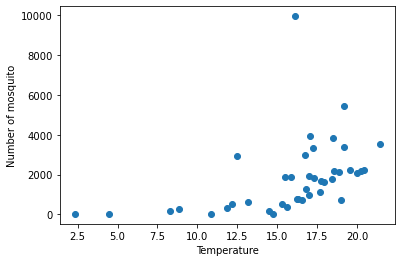

In [110]:
%matplotlib inline

# 2.View Data Distribution
plt.scatter(x1, y1)
plt.xlabel('Temperature')
plt.ylabel('Number of mosquito')

In [111]:
# 3.Creating regression models
lr_model1 = LinearRegression()

In [112]:
# 4.Convert Dimension
x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
y1 = np.array(y1)
y1 = y1.reshape(-1, 1)

lr_model1.fit(x1, y1)

LinearRegression()

In [113]:
# 5.Calculate the predicted value
y1_predict = lr_model1.predict(x1)

In [114]:
# 6.Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
MSE1 = mean_squared_error(y1, y1_predict)
R21 = r2_score(y1, y1_predict)
print('MSE:', MSE1, 'R2:', R21)

MSE: 2663476.074565023 R2: 0.18789754441238127


Text(0, 0.5, 'Number of mosquito')

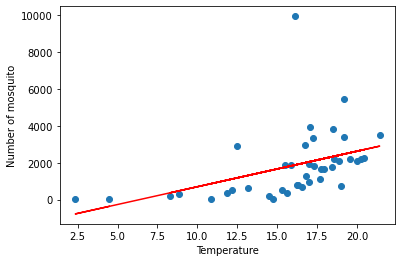

In [115]:
# 7.Regression Visualization
plt.scatter(x1, y1)
plt.plot(x1, y1_predict, 'r')
plt.xlabel('Temperature')
plt.ylabel('Number of mosquito')

In [116]:
# 8.Calculate Coefficients
k1 = lr_model1.coef_[0][0]
b1 = lr_model1.intercept_[0]
print('y=', k1, 'x', '+', b1)

y= 192.58400433041743 x + -1225.7682678983172


So, the linear regression model for mosquito(all) and temperature is:
$$
y=192.584x-1225.768
$$
  
#### No. of mosquito(Female) vs. weather feature(Humidity)

In [117]:
# 1.Variable assignment
x2 = data.loc[:, 'relative_humidity']
y2 = data.loc[:, 'Female']

Text(0, 0.5, 'Number of Mosquito')

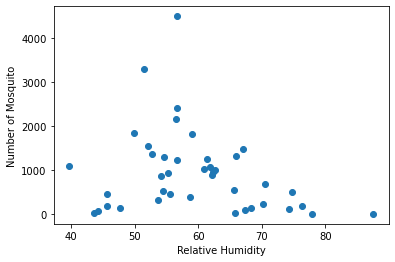

In [118]:
# 2.View Data Distribution
plt.scatter(x2, y2)
plt.xlabel('Relative Humidity')
plt.ylabel('Number of Mosquito')

In [119]:
# 3.Creating regression models
lr_model2 = LinearRegression()

In [120]:
# 4.Convert Dimension
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y2 = np.array(y2)
y2 = y2.reshape(-1, 1)

lr_model2.fit(x2, y2)

LinearRegression()

In [121]:
# 5.Calculate the predicted value
y2_predict = lr_model2.predict(x2)

In [122]:
# 6.Model Evaluation
MSE2 = mean_squared_error(y2, y2_predict)
R22 = r2_score(y2, y2_predict)
print('MSE:', MSE2, 'R2:', R22)

MSE: 797288.4930727655 R2: 0.060863701102749745


Text(0, 0.5, 'Number of Female Mosquito')

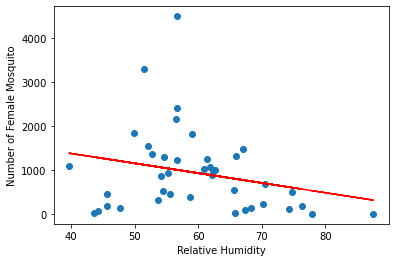

In [123]:
# 7.Regression Visualization
plt.scatter(x2, y2)
plt.plot(x2, y2_predict, 'r')
plt.xlabel('Relative Humidity')
plt.ylabel('Number of Female Mosquito')

In [124]:
# 8.Calculate Coefficients
k2 = lr_model2.coef_[0][0]
b2 = lr_model2.intercept_[0]
print('y=', k2, 'x', '+', b2)

y= -22.25246060829027 x + 2272.929130035081


So, the linear regression model for mosquito(Female) and Relative Humidity is:
$$
y=-22.252x+2272.93
$$

### Polynomial Linear Regression
<b>No. of male mosquito vs. weather features(choose by feature selection)</b>
* Step 1: Feature Selection - Find those features which are more important
* Step 2: Cross Validation - Find which model has the best performance
  
Let the highest degree equals 2

In [125]:
from sklearn.feature_selection import f_regression

In [126]:
# Filter the columns we need
data_feature_selection = data.drop(['Male', 'Female', 'Mos Count'], axis=1)
data_feature_selection.shape

(41, 11)

In [127]:
y = data.loc[:, 'Male']

In [128]:
# Feature Selection
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(data_feature_selection)

In [129]:
# Find the important factors
F_test, p_value = f_regression(X_poly, y)
feature_df = pd.DataFrame({
    'feature': poly_features.get_feature_names(),
    'F_test': F_test,
    'p_value': p_value
})
feature_df

,feature,F_test,p_value
0,x0,12.573031,0.001036
1,x1,15.273729,0.000360
2,x2,0.005489,0.941320
3,x3,7.218529,0.010549
4,x4,1.478699,0.231287
...,...,...,...
72,x8 x9,NaN,NaN
73,x8 x10,1.253787,0.269679
74,x9^2,1.259052,0.268692
75,x9 x10,1.663475,0.204731


Here, we will create 3 different models here (include different subsets of features) and compare them by using k-fold cross validation

In [130]:
# Create different models
from sklearn.feature_selection import SelectKBest

X_best_2feature = SelectKBest(f_regression, 2).fit_transform(X_poly, y)
X_best_3feature = SelectKBest(f_regression, 3).fit_transform(X_poly, y)
X_best_4feature = SelectKBest(f_regression, 4).fit_transform(X_poly, y)

In [131]:
print('Best Two: Shape:', X_best_2feature.shape, 'Feature:',
      SelectKBest(f_regression, 2).fit(X_poly, y).get_support(indices=True))
print('Best Three: Shape:', X_best_3feature.shape, 'Feature:',
      SelectKBest(f_regression, 3).fit(X_poly, y).get_support(indices=True))
print('Best Four: Shape:', X_best_4feature.shape, 'Feature:',
      SelectKBest(f_regression, 4).fit(X_poly, y).get_support(indices=True))

Best Two: Shape: (41, 2) Feature: [ 1 22]
Best Three: Shape: (41, 3) Feature: [ 1 12 22]
Best Four: Shape: (41, 4) Feature: [ 0  1 12 22]


In [132]:
def get_feature_func(list_of_index):

    save = []
    for index in list_of_index:
        save.append(feature_df.loc[index]['feature'])

    print(save)

In [133]:
# The elements included in the three different models
list_of_feature_index = [[1, 22], [1, 12, 22], [0, 1, 12, 22]]
for i in list_of_feature_index:
    get_feature_func(i)

['x1', 'x1^2']
['x1', 'x0 x1', 'x1^2']
['x0', 'x1', 'x0 x1', 'x1^2']


We perform <b>Normalization</b> and <b>Standardization</b> here:

In [134]:
from sklearn.preprocessing import StandardScaler
y = np.array(y).reshape(-1, 1)
y3 = StandardScaler().fit_transform(y)

In [135]:
# This method is used for:
# Cross-validate while training the model with normalization and standardization
from sklearn.model_selection import cross_val_score


def linreg_norm_std(x_in, y_in, fold_in):

    lr_model3 = LinearRegression(normalize=True)

    x_in = StandardScaler().fit_transform(x_in)
    y_in = np.array(y_in).reshape(-1, 1)
    y_in = StandardScaler().fit_transform(y_in)

    lr_model3.fit(x_in, y_in)

    print('Coef:', lr_model3.coef_, 'Intercept:', lr_model3.intercept_)

    def cross_validate(fold_in):
        score = cross_val_score(lr_model3,
                                x_in,
                                y_in,
                                scoring='neg_mean_squared_error',
                                cv=fold_in,
                                error_score=np.nan)
        return -score.mean()

    print('MSE:', cross_validate(fold_in))
    y_in_predict = lr_model3.predict(x_in)
    print('R2:', r2_score(y_in, y_in_predict))

    parameter = []
    parameter.append([lr_model3.coef_[0], lr_model3.intercept_[0]])

    return parameter

In [136]:
poly_linreg_list = [X_best_2feature, X_best_3feature, X_best_4feature]

# 10-fold cross validate
for data in poly_linreg_list:

    result = linreg_norm_std(data, y3, fold_in=10)
    print('------------')

Coef: [[-164.8023555   164.27242507]] Intercept: [2.29389361e-12]
MSE: 1.0468955608098414
R2: 0.4654687997706026
------------
Coef: [[-184.29721286    3.1827828   180.59554588]] Intercept: [2.52955266e-12]
MSE: 0.919898394958194
R2: 0.5334919821303234
------------
Coef: [[  75.76417249 -254.32703055 -148.92578766  327.51660073]] Intercept: [3.45382515e-12]
MSE: 1.0646089399610439
R2: 0.5362325162530581
------------


<b>It can be seen that the more features there are, the better the model performs on the training data (based on R-Square), however, the second model (3-feature) has the lowest MSE. With the dataset of this project, the differences of performance are very slight.</b>
  
For polynominal model of best two features:
$$
y=-164.8x_1+164.3x_1^2+2.29\times10^{-12}
$$
For polynominal model of best three features:
$$
y=-184.3x_1+3.183x_0x_1+180.6x_1^2+2.53\times10^{-12}
$$
For polynominal model of best four features:
$$
y=75.76x_0-254.33x_1-148.93x_0x_1+327.52x_1^2+3.45\times10^{-12}
$$
  